<a href="https://colab.research.google.com/github/ductrunglyn/ductrunglyn.arima_lstm_gru/blob/main/dubaoluongmua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import thư viện

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import os
import cv2
import csv
import zipfile

In [ ]:
import pandas as pd

# Chuyển dữ liệu từ định dạng '.npy' sang file ảnh '.png' và file '.csv'

### Giải nén dữ liệu

In [ ]:
def unzip_file(zip_file_path, extract_to_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)

zip_file_path = '/content/drive/MyDrive/DuBaoLuongMua_1/20200623-20200915 _Chinh.zip'
extract_to_path = '/content/drive/MyDrive/DuBaoLuongMua_1/'

unzip_file(zip_file_path, extract_to_path)

### Đầu vào dữ liệu - Tạo forder lưu ảnh đã chuyển định dạng và file csv

In [ ]:
%cd '/content/drive/MyDrive/DuBaoLuongMua_1/'

folder_data = './20200623-20200915 _Chinh/'

# Tạo thư mục chưa file dữ liệu
img_data = "./dataSet/data_img/"
os.makedirs(img_data, exist_ok=True)

/content/drive/MyDrive/DuBaoLuongMua_1


In [ ]:
def img(img_data, folder):
    for i in os.listdir(folder):
        data = np.load(folder + i)
        name = i.split('.')

        matplotlib.image.imsave((img_data + name[0] + '.png'), data)

img(img_data, folder_data)

### Xem cấu trúc ảnh

In [ ]:
img = './dataSet/data_img/PHA200623000004.png'
img = cv2.imread(img)

print('Kích thước ảnh: ', img.shape)

Kích thước ảnh:  (150, 150, 3)


# Tính lượng mưa trên ảnh Rada

In [ ]:
%cd '/content/drive/MyDrive/DuBaoLuongMua_1/'
img_data = "./dataSet/data_img/"

/content/drive/MyDrive/DuBaoLuongMua_1


### Áp dụng công thức tính lượng mưa

In [ ]:
def estimate_rainfall(image_path):
    # Đọc ảnh
    # Chuyển đổi thành ảnh xám
    image = cv2.imread(image_path)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    sum = 0
    for i in range(len(img_gray)):
        for j in range(len(img_gray)):
            dbZ = (((img_gray[i][j] - 0.5) / 255) * 70) - 10
            Z = 10 ** (dbZ / 10)
            R = (Z / 200) ** (5/8)
            sum += R

    return sum


data_rainfall = []
for img in os.listdir(img_data):
    # Đường dẫn đến ảnh
    image_path = (img_data + img)

    # Ước tính lượng mưa
    estimated_rainfall = estimate_rainfall(image_path)

    rainfall = (estimated_rainfall / 22500)

    data_rainfall.append(rainfall)

    print(f"Estimated rainfall: {rainfall} mm/h")

Estimated rainfall: 0.09282509542601565 mm/h
Estimated rainfall: 0.08986809557503533 mm/h
Estimated rainfall: 0.09085982462048571 mm/h
Estimated rainfall: 0.0957148514648877 mm/h
Estimated rainfall: 0.13571798047797123 mm/h
Estimated rainfall: 0.09799144119915917 mm/h
Estimated rainfall: 0.10241423087742518 mm/h
Estimated rainfall: 0.1247974980577054 mm/h
Estimated rainfall: 0.13174227776531658 mm/h
Estimated rainfall: 0.11406693599203827 mm/h
Estimated rainfall: 0.10423578535829119 mm/h
Estimated rainfall: 0.11046414309212609 mm/h
Estimated rainfall: 0.09505714351061408 mm/h
Estimated rainfall: 0.10554885547072097 mm/h
Estimated rainfall: 0.10533456160035007 mm/h
Estimated rainfall: 0.10964059021484393 mm/h
Estimated rainfall: 0.1159145697132755 mm/h
Estimated rainfall: 0.10795833004971106 mm/h
Estimated rainfall: 0.07828938572515264 mm/h
Estimated rainfall: 0.09055763339056183 mm/h
Estimated rainfall: 0.11041300503858177 mm/h
Estimated rainfall: 0.08075282079030302 mm/h
Estimated rai

### Lưu dữ liệu đã tính lượng mưa vào file CSV

In [ ]:
# Dữ liệu mảng một chiều

data = data_rainfall
column_names = ['LuongMua']

# Đường dẫn và tên file CSV
os.makedirs('./data_csv_luongmua/', exist_ok=True)
data_csv = './data_csv_luongmua/ketqua_22500.csv'

# Mở file CSV để ghi
with open(data_csv, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)

    writer.writerow(column_names)

    for value in data:
        writer.writerow([value])

In [ ]:
# Thêm cột STT

input_file = data_csv
data_csv_stt = './data_csv_luongmua/ketqua_22500_STT.csv'

new_column_name = 'STT'

with open(input_file, 'r') as file:
    reader = csv.reader(file)
    rows = list(reader)

# Thêm tên cột số thứ tự vào hàng đầu tiên của mỗi dòng
rows_with_index = [[new_column_name] + rows[0]] + [[index] + row for index, row in enumerate(rows[1:], start=1)]

with open(data_csv_stt, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows_with_index)

# Trực quan hóa dữ liệu


In [ ]:
# Đọc file csv
%cd '/content/drive/MyDrive/DuBaoLuongMua_1/'
sales = pd.read_csv('./data_csv_luongmua/ketqua_22500_STT.csv', index_col=0, infer_datetime_format=True)

/content/drive/MyDrive/DuBaoLuongMua_1


In [ ]:
# Hiển thị 5 dòng dữ liệu đầu tiên

sales.head()

,LuongMua
STT,
1,0.092825
2,0.089868
3,0.090860
4,0.095715
5,0.135718


<Axes: xlabel='STT'>

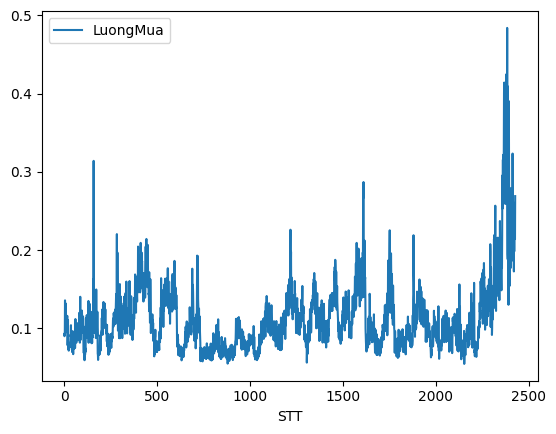

In [ ]:
# Trực quan dữ liệu

sales.plot()

# Load dữ liệu

### Đọc dữ liệu

In [ ]:
# Đọc file csv
%cd '/content/drive/MyDrive/DuBaoLuongMua_1/'

data_csv = './data_csv_luongmua/ketqua_22500.csv'
dataset = pd.read_csv(data_csv)

/content/drive/MyDrive/DuBaoLuongMua_1


In [ ]:
# Thông kê dữ liệu
print(dataset.describe())

          LuongMua
count  2427.000000
mean      0.112376
std       0.045312
min       0.054439
25%       0.083172
50%       0.101251
75%       0.128697
max       0.484107


In [ ]:
print(dataset.head())

   LuongMua
0  0.092825
1  0.089868
2  0.090860
3  0.095715
4  0.135718


In [ ]:
print(dataset)

      LuongMua
0     0.092825
1     0.089868
2     0.090860
3     0.095715
4     0.135718
...        ...
2422  0.252740
2423  0.230781
2424  0.215372
2425  0.214095
2426  0.269025

[2427 rows x 1 columns]


### Chia dữ liệu

In [ ]:
# Dữ liệu đầu vào

data = dataset.values[:]

print("Tổng lượng dữ liệu ban đầu: ", len(data))

Tổng lượng dữ liệu ban đầu:  2427


In [ ]:
# Chia data thành tập train, test

size = int(len(data) * 0.9)
size_conLai = len(data) - size

train_val = data[:size]
print("Dữ liệu tập training + validation: ", len(train_val))

data_train = data[:size - size_conLai]
print("Dữ liệu tập training: ", len(data_train))

data_val = data[-(size_conLai * 2):-(size_conLai)]
print("Dữ liệu tập validation: ", len(data_val))

data_test = data[size:]
print("Dữ liệu tập testing: ", len(data_test))

Dữ liệu tập training + validation:  2184
Dữ liệu tập training:  1941
Dữ liệu tập validation:  243
Dữ liệu tập testing:  243


### Chuẩn hóa dữ liệu

In [ ]:
# Đưa dữ liệu về chuỗi 1D

def convert1D(data):
    array_2d = np.array(data)
    array_1d = array_2d.flatten()

    return array_1d

train_val = convert1D(train_val)
print("Dữ liệu train + val đã chuẩn hóa: ")
print(train_val)
print()

data_train = convert1D(data_train)
print("Dữ liệu train đã chuẩn hóa: ")
print(data_train)
print()

data_val = convert1D(data_val)
print("Dữ liệu val đã chuẩn hóa: ")
print(data_val)
print()

data_test = convert1D(data_test)
print("Dữ liệu test đã chuẩn hóa: ")
print(data_test)
print()

Dữ liệu train + val đã chuẩn hóa: 
[0.0928251  0.0898681  0.09085982 ... 0.08917127 0.09321063 0.09441335]

Dữ liệu train đã chuẩn hóa: 
[0.0928251  0.0898681  0.09085982 ... 0.11952804 0.11224957 0.10421152]

Dữ liệu val đã chuẩn hóa: 
[0.1112796  0.10699906 0.10170405 0.09829368 0.08275279 0.08995771
 0.09916832 0.11499992 0.12321009 0.09957822 0.08308801 0.09904925
 0.09871753 0.12268942 0.11859619 0.10368731 0.09634553 0.10684081
 0.08881635 0.09266546 0.09751881 0.09214562 0.10631913 0.09660731
 0.08910421 0.09642286 0.08943515 0.08213805 0.07732829 0.07913335
 0.07596221 0.07025242 0.06283752 0.07322341 0.06463082 0.06668985
 0.08144737 0.0805158  0.07871142 0.08526873 0.09778025 0.10257924
 0.08665775 0.07687642 0.08128782 0.0985647  0.09086724 0.09062016
 0.12244218 0.09483906 0.11567039 0.10945291 0.11086379 0.1101084
 0.11036205 0.10205756 0.1088182  0.08829748 0.09527091 0.09792914
 0.1026197  0.09950271 0.08314429 0.08366979 0.09932677 0.10212851
 0.09794214 0.09667561 0.08

# Mô hình ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

### Tìm các thông số p d q

In [ ]:
def find_pdq(input_data_train, input_data_val):
  mae = 999999
  p1 = 0
  d1 = 0
  q1 = 0

  for p in range(0, 6):
    for d in range(0, 3):
      for q in range(0, 6):
  # Tạo mô hình ARIMA
        model_arima = sm.tsa.arima.ARIMA(input_data_train, order=(p, d, q))
        model_arima_fit = model_arima.fit()
        pre_data = model_arima_fit.forecast(steps = size_conLai)

  # Trừ hai mảng
        array_mae_val = abs(pre_data - input_data_val)

  # Tính MAE
        sum = 0
        for i in range(0, len(array_mae_val)):
          sum += array_mae_val[i]

        average = sum / size_conLai

  # IN ra các thông số pdq tốt nhất và MAE
        if average < mae:
          mae = average
          p1 = p
          d1 = d
          q1 = q

  result_list = [p1, d1, q1, mae, pre_data]

  return result_list

### Sử dụng tập data_train để tính pre_val và mae_val_pre

In [ ]:
# Sử dụng tập data_train để dự đoán ra tập pre_val
arima_pre_val = find_pdq(data_train, data_val)

print("p1 = ", arima_pre_val[0])
print("d1 = ", arima_pre_val[1])
print("q1 = ", arima_pre_val[2])
print("MAE ARIMA predict val = ", arima_pre_val[3])
print("Data predict val = ", arima_pre_val[4])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Like

p1 =  4
d1 =  2
q1 =  5
MAE ARIMA predict val =  0.014405990815957554
Data predict val =  [0.10763072 0.10745748 0.10791041 0.10550312 0.10756347 0.10675952
 0.10761847 0.10619779 0.10657922 0.10706946 0.10703785 0.10638534
 0.10639914 0.10673785 0.10685698 0.10635996 0.10623567 0.1065157
 0.1066135  0.10629752 0.10611273 0.10628603 0.1064017  0.10618411
 0.10599545 0.1060852  0.10618921 0.10605005 0.10587327 0.10590145
 0.10598578 0.10589846 0.10574441 0.10573031 0.10579013 0.10573695
 0.10560745 0.10556697 0.1056024  0.10556938 0.10546319 0.10540789
 0.10542154 0.1053989  0.10531266 0.10525065 0.10524629 0.10522744
 0.10515718 0.10509368 0.10507535 0.10505623 0.104998   0.10493609
 0.10490754 0.10488591 0.10483623 0.10477743 0.10474185 0.10471674
 0.10467274 0.10461759 0.10457751 0.10454874 0.10450823 0.10445662
 0.10441393 0.10438181 0.10434318 0.10429468 0.10425071 0.10421576
 0.10417791 0.10413195 0.10408758 0.1040504  0.10401265 0.10396862
 0.10392438 0.10388555 0.10384749 0.1038

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Dùng tập train_val để tính pre_test và tính mae_test_pre

In [ ]:
# # Sử dụng tập data_train để dự đoán ra tập pre_val
# arima_pre_test = find_pdq(train_val, data_test)

# print("p1 = ", arima_pre_test[0])
# print("d1 = ", arima_pre_test[1])
# print("q1 = ", arima_pre_test[2])
# print("MAE ARIMA predict test = ", arima_pre_test[3])
# print("Data predict test = ", arima_pre_test[4])

model_arima = sm.tsa.arima.ARIMA(train_val, order=(arima_pre_val[0], arima_pre_val[1], arima_pre_val[2]))
model_arima_fit = model_arima.fit()
arima_pre_test = model_arima_fit.forecast(steps = size_conLai)


# Tính MAE
array_mae_test = abs(arima_pre_test - data_test)
sum = 0
for i in range(0, len(array_mae_test)):
  sum += array_mae_test[i]


print("p1 = ", arima_pre_val[0])
print("d1 = ", arima_pre_val[1])
print("q1 = ", arima_pre_val[2])
print("MAE ARIMA predict test = ", (sum / size_conLai))
print("Data predict test = ", arima_pre_test)

p1 =  4
d1 =  2
q1 =  5
MAE ARIMA predict test =  0.08781065106425262
Data predict test =  [0.09603933 0.09393394 0.09436252 0.09382562 0.09574911 0.09281774
 0.09515136 0.09424171 0.09447978 0.09344577 0.09564663 0.09326163
 0.0946089  0.09425656 0.09469861 0.09324846 0.09532951 0.09368188
 0.09430917 0.09407802 0.09486592 0.09325202 0.0949213  0.09396672
 0.0942218  0.09383841 0.09490135 0.09339992 0.09453886 0.09407923
 0.09426368 0.09364143 0.09479723 0.09360407 0.09425674 0.09404522
 0.09434194 0.09353937 0.09459643 0.09378381 0.09409666 0.09392513
 0.09438594 0.09353398 0.09436157 0.09388968 0.09403745 0.093784
 0.09436193 0.09359306 0.09414817 0.09390933 0.09403535 0.09366978
 0.09427114 0.09367222 0.0939889  0.09385968 0.09404492 0.09360413
 0.09413758 0.09373336 0.0938904  0.09377231 0.09403369 0.09358446
 0.0939926  0.09375502 0.09383939 0.09367887 0.09398793 0.09359301
 0.09386228 0.09373395 0.09381319 0.09360129 0.09391059 0.0936077
 0.09376064 0.0936804  0.09378979 0.09354

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



### In dữ liệu ra file csv cho từng thành phần

Data gốc

In [ ]:
data_csv_luongmua = './data_csv_luongmua/'
os.makedirs(data_csv_luongmua, exist_ok=True)

In [ ]:
val_csv = np.array(data_val)
df = pd.DataFrame(val_csv, columns=['val_goc'])
csv_val_path = './data_csv_luongmua/data_val.csv'
df.to_csv(csv_val_path, index=False)

In [ ]:
test_csv = np.array(data_test)
df = pd.DataFrame(test_csv, columns=['test_goc'])
csv_test_path = './data_csv_luongmua/data_test.csv'
df.to_csv(csv_test_path, index=False)

Data ARIMA

In [ ]:
df = pd.read_csv(csv_val_path)
df['val_arima'] = np.array(arima_pre_val[4])
df.to_csv(csv_val_path, index=False)

In [ ]:
df = pd.read_csv(csv_test_path)
df['test_arima'] = np.array(arima_pre_test)
df.to_csv(csv_test_path, index=False)

# Mô hình LSTM

### Thư viện

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable #Tensor
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pyplot import figure

### Xử lý dữ liệu

In [ ]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [ ]:
# Mở rộng dữ liệu đầu vào
sc = MinMaxScaler()
data_lstm = sc.fit_transform(dataset)
seq_length = 4
x, y = sliding_windows(data_lstm, seq_length)


dataX = Variable(torch.Tensor(np.array(x))) # All data
dataY =  Variable(torch.Tensor(np.array(y)))

train_valX = Variable(torch.Tensor(np.array(x[:size]))) # Train + val data
train_valY = Variable(torch.Tensor(np.array(y[:size])))

trainX = Variable(torch.Tensor(np.array(x[:size - size_conLai]))) # Train data
trainY = Variable(torch.Tensor(np.array(y[:size - size_conLai])))

### Model LSTM

In [ ]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        return out

### Sử dụng data_train để dự đoán ra tập pre_val và tính MAE

In [ ]:
model_type='LSTM'
num_epochs = 2500
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

model = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 1000, gamma = 0.1)


# Train the model
for epoch in range(num_epochs):
    outputs = model(trainX)
    optimizer.zero_grad()
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    lr_scheduler.step()

    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f, lr: %1.5f" % (epoch, loss.item(), lr_scheduler.optimizer.param_groups[0]['lr']))

Epoch: 0, loss: 0.14262, lr: 0.01000
Epoch: 100, loss: 0.00360, lr: 0.01000
Epoch: 200, loss: 0.00170, lr: 0.01000
Epoch: 300, loss: 0.00140, lr: 0.01000
Epoch: 400, loss: 0.00140, lr: 0.01000
Epoch: 500, loss: 0.00139, lr: 0.01000
Epoch: 600, loss: 0.00139, lr: 0.01000
Epoch: 700, loss: 0.00139, lr: 0.01000
Epoch: 800, loss: 0.00139, lr: 0.01000
Epoch: 900, loss: 0.00139, lr: 0.01000
Epoch: 1000, loss: 0.00139, lr: 0.00100
Epoch: 1100, loss: 0.00139, lr: 0.00100
Epoch: 1200, loss: 0.00139, lr: 0.00100
Epoch: 1300, loss: 0.00139, lr: 0.00100
Epoch: 1400, loss: 0.00139, lr: 0.00100
Epoch: 1500, loss: 0.00139, lr: 0.00100
Epoch: 1600, loss: 0.00139, lr: 0.00100
Epoch: 1700, loss: 0.00139, lr: 0.00100
Epoch: 1800, loss: 0.00139, lr: 0.00100
Epoch: 1900, loss: 0.00139, lr: 0.00100
Epoch: 2000, loss: 0.00139, lr: 0.00010
Epoch: 2100, loss: 0.00139, lr: 0.00010
Epoch: 2200, loss: 0.00139, lr: 0.00010
Epoch: 2300, loss: 0.00139, lr: 0.00010
Epoch: 2400, loss: 0.00139, lr: 0.00010


In [ ]:
with torch.no_grad():
    model.eval()
    data_predict = model(dataX).cpu().numpy()

    _x = data_predict[-4:]
    pre_X = [[_x]]

    for month in range(243):
        x = torch.Tensor(np.array(pre_X[-1]))
        y = model(x)
        y = y.cpu().detach().numpy()
        data_predict = np.append(data_predict, y, axis=0)
        _x = _x[1:]
        _x = np.append(_x, y, axis=0)
        pre_X.append([_x])

# Convert the predictions back to original scale
data_predict_plot = sc.inverse_transform(data_predict)

In [ ]:
# Predict val

pre_val = data_predict_plot[-(size_conLai * 2):-(size_conLai)]

concatenated_array = []
concatenated = np.concatenate(pre_val)
concatenated_array.append(concatenated)

# Chuyển danh sách các mảng thành mảng một chiều duy nhất
lstm_pre_val = np.concatenate(concatenated_array)

print('Total: ',len(lstm_pre_val))
print(lstm_pre_val)

Total:  243
[0.09668291 0.09903914 0.09334532 0.10022953 0.09420771 0.10164476
 0.10512492 0.12439147 0.10624893 0.10291132 0.09742356 0.09055571
 0.0947227  0.08524031 0.09029797 0.09566861 0.09376637 0.09704129
 0.0970471  0.11418225 0.11751726 0.12443253 0.14187312 0.1189325
 0.09661832 0.08491684 0.07193682 0.07254496 0.07805646 0.0727896
 0.07249999 0.0743245  0.07559022 0.07689217 0.07165188 0.07739793
 0.07510279 0.07568861 0.07960688 0.07917364 0.07733265 0.07854066
 0.07817996 0.08183152 0.09153281 0.093329   0.09901928 0.101918
 0.09529732 0.10293714 0.10426739 0.10294601 0.11883538 0.11945932
 0.12239645 0.1190749  0.11922411 0.13860728 0.14466883 0.1378601
 0.14575477 0.13696745 0.14872898 0.15221903 0.15092011 0.15977338
 0.14370991 0.15127017 0.14656489 0.12584361 0.13113253 0.14164667
 0.14011678 0.15747935 0.15478417 0.16599487 0.16260736 0.16188261
 0.14757136 0.14838403 0.14390624 0.12078895 0.11595062 0.12116738
 0.12357571 0.11904001 0.11743502 0.1318095  0.13307258

In [ ]:
# Tính MAE

result_val = abs(lstm_pre_val - data_val)

sum = 0
for i in result_val:
    sum += i

print("MAE LSTM predict val = ", sum / 243)

MAE LSTM predict val =  0.06936627206106288


### Sử dụng train_val để dự đoán ra tập pre_test và tính MAE

In [ ]:
model_type='LSTM'
num_epochs = 2500
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

model = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 1000, gamma = 0.1)


# Train the model
for epoch in range(num_epochs):
    outputs = model(train_valX)
    optimizer.zero_grad()
    loss = criterion(outputs, train_valY)
    loss.backward()
    optimizer.step()
    lr_scheduler.step()

    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f, lr: %1.5f" % (epoch, loss.item(), lr_scheduler.optimizer.param_groups[0]['lr']))

Epoch: 0, loss: 0.11312, lr: 0.01000
Epoch: 100, loss: 0.00499, lr: 0.01000
Epoch: 200, loss: 0.00250, lr: 0.01000
Epoch: 300, loss: 0.00139, lr: 0.01000
Epoch: 400, loss: 0.00136, lr: 0.01000
Epoch: 500, loss: 0.00134, lr: 0.01000
Epoch: 600, loss: 0.00134, lr: 0.01000
Epoch: 700, loss: 0.00134, lr: 0.01000
Epoch: 800, loss: 0.00134, lr: 0.01000
Epoch: 900, loss: 0.00134, lr: 0.01000
Epoch: 1000, loss: 0.00133, lr: 0.00100
Epoch: 1100, loss: 0.00133, lr: 0.00100
Epoch: 1200, loss: 0.00133, lr: 0.00100
Epoch: 1300, loss: 0.00133, lr: 0.00100
Epoch: 1400, loss: 0.00133, lr: 0.00100
Epoch: 1500, loss: 0.00133, lr: 0.00100
Epoch: 1600, loss: 0.00133, lr: 0.00100
Epoch: 1700, loss: 0.00133, lr: 0.00100
Epoch: 1800, loss: 0.00133, lr: 0.00100
Epoch: 1900, loss: 0.00133, lr: 0.00100
Epoch: 2000, loss: 0.00133, lr: 0.00010
Epoch: 2100, loss: 0.00133, lr: 0.00010
Epoch: 2200, loss: 0.00133, lr: 0.00010
Epoch: 2300, loss: 0.00133, lr: 0.00010
Epoch: 2400, loss: 0.00133, lr: 0.00010


In [ ]:
with torch.no_grad():
    model.eval()
    data_predict = model(dataX).cpu().numpy()

    _x = data_predict[-4:]
    pre_X = [[_x]]

    for month in range(243):
        x = torch.Tensor(np.array(pre_X[-1]))
        y = model(x)
        y = y.cpu().detach().numpy()
        data_predict = np.append(data_predict, y, axis=0)
        _x = _x[1:]
        _x = np.append(_x, y, axis=0)
        pre_X.append([_x])

# Convert the predictions back to original scale
data_predict_plot = sc.inverse_transform(data_predict)

In [ ]:
# Predict test

pre_test = data_predict_plot[-(size_conLai * 2):-(size_conLai)]

concatenated_array = []
concatenated = np.concatenate(pre_test)
concatenated_array.append(concatenated)

# Chuyển danh sách các mảng thành mảng một chiều duy nhất
lstm_pre_test = np.concatenate(concatenated_array)

print('Total: ',len(lstm_pre_test))
print(lstm_pre_test)

Total:  243
[0.09602539 0.09873371 0.09363145 0.09958506 0.09438672 0.10116369
 0.10495178 0.12484369 0.1073895  0.10205808 0.09657819 0.09055032
 0.09425641 0.08590869 0.08979518 0.09540795 0.09413775 0.09665611
 0.0967171  0.11398643 0.11827922 0.12456594 0.14220546 0.1193947
 0.09661438 0.0843904  0.07241953 0.07245035 0.07786128 0.07370265
 0.07278375 0.07422309 0.07566871 0.07709749 0.07241382 0.07703156
 0.07553349 0.07592715 0.07946264 0.07940127 0.07769524 0.07850361
 0.07829686 0.08172575 0.09125875 0.09362815 0.09878406 0.10159929
 0.09543316 0.10213928 0.10414827 0.10293568 0.11832139 0.11993265
 0.12228227 0.11818596 0.11835057 0.13891512 0.14676875 0.13805999
 0.14460745 0.13647878 0.14897996 0.15335831 0.15180625 0.16012359
 0.14325987 0.15039757 0.14639355 0.12508824 0.12891762 0.14205791
 0.1417162  0.15833206 0.15578122 0.16706817 0.16360168 0.1625119
 0.14621046 0.14712498 0.14344485 0.12011212 0.11375949 0.12014696
 0.12425429 0.11894697 0.11618976 0.1313848  0.13420

In [ ]:
# Tính MAE

result_test = abs(lstm_pre_test - data_test)

sum = 0
for i in result_test:
    sum += i

print("MAE LSTM predict test = ", sum / 243)

MAE LSTM predict test =  0.034805465531318365



### In dữ liệu ra file csv cho từng thành phần

In [ ]:
# Val predict

df = pd.read_csv(csv_val_path)
df['val_lstm'] = np.array(lstm_pre_val)
df.to_csv(csv_val_path, index=False)

In [ ]:
# Test predict

df = pd.read_csv(csv_test_path)
df['test_lstm'] = np.array(lstm_pre_test)
df.to_csv(csv_test_path, index=False)

# Mô hình GRU

### Thư viện

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

import pandas as pd
from sklearn.model_selection import train_test_split

set_seed(455)
np.random.seed(455)

### Xử lý dữ liệu

In [ ]:
# Chia data thành tập train, test

size = int(len(dataset) * 0.9)
size_conLai = len(dataset) - size

train_val_gru = dataset[:size]
data_train_gru = dataset[:size - size_conLai]
data_val_gru = dataset[-(size_conLai * 2):-(size_conLai)]
data_test_gru = dataset[size:]

In [ ]:
X_train_val = train_val_gru.iloc[:, -1]
y_train_val = train_val_gru.iloc[:, -1]

X_train = data_train_gru.iloc[:, -1]
y_train = data_train_gru.iloc[:, -1]

X_val = data_val_gru.iloc[:, -1]
y_val = data_val_gru.iloc[:, -1]

X_test = data_test_gru.iloc[:, -1]
y_test = data_test_gru.iloc[:, -1]

### Model GRU

In [ ]:
n_steps = 60
features = 1

In [ ]:
# Model GRU

model_gru = Sequential()
model_gru.add(GRU(units=125, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(units=1))

# Compiling the model GRU
model_gru.compile(optimizer="RMSprop", loss="mse")

model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 125)               48000     
                                                                 
 dense_1 (Dense)             (None, 1)                 126       
                                                                 
Total params: 48,126
Trainable params: 48,126
Non-trainable params: 0
_________________________________________________________________


### Sử dụng data_train để dự đoán ra tập pre_val và tính MAE

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

model_gru.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
 1/61 [..............................] - ETA: 5s - loss: 0.0124

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


61/61 [==============================] - 2s 29ms/step - loss: 0.0012
Epoch 2/50
61/61 [==============================] - 2s 29ms/step - loss: 5.9191e-04
Epoch 3/50
61/61 [==============================] - 2s 29ms/step - loss: 3.6844e-04
Epoch 4/50
61/61 [==============================] - 2s 29ms/step - loss: 2.1053e-04
Epoch 5/50
61/61 [==============================] - 2s 30ms/step - loss: 1.3314e-04
Epoch 6/50
61/61 [==============================] - 2s 29ms/step - loss: 8.6074e-05
Epoch 7/50
61/61 [==============================] - 2s 29ms/step - loss: 5.9011e-05
Epoch 8/50
61/61 [==============================] - 2s 30ms/step - loss: 4.8664e-05
Epoch 9/50
61/61 [==============================] - 2s 30ms/step - loss: 4.4766e-05
Epoch 10/50
61/61 [==============================] - 2s 29ms/step - loss: 4.1435e-05
Epoch 11/50
61/61 [==============================] - 2s 30ms/step - loss: 4.1361e-05
Epoch 12/50
61/61 [==============================] - 2s 31ms/step - loss: 3.9939e-05
Epoc

In [ ]:
gru_pre_val = model_gru.predict(X_val)

8/8 [==============================] - 0s 8ms/step


In [ ]:
gru_pre_val = convert1D(gru_pre_val)

print("Tổng dữ liệu dự đoán: ", len(gru_pre_val))
print(gru_pre_val)

Tổng dữ liệu dự đoán:  243
[0.11604223 0.11180347 0.10656002 0.10318276 0.08779202 0.09492747
 0.10404892 0.11972612 0.12785554 0.10445484 0.08812399 0.10393101
 0.1036025  0.12734002 0.12328707 0.10852399 0.10125352 0.11164678
 0.09379712 0.09760907 0.10241541 0.09709425 0.11113017 0.10151275
 0.09408221 0.10133008 0.09440996 0.08718318 0.08241965 0.08420737
 0.08106668 0.07541161 0.06806764 0.07835415 0.0698438  0.07188314
 0.08649915 0.08557653 0.0837895  0.09028371 0.10267432 0.10742671
 0.09165935 0.08197212 0.08634112 0.10345116 0.09582821 0.09558352
 0.12709522 0.09976163 0.12039001 0.11423338 0.11563046 0.11488246
 0.11513365 0.10691009 0.11360487 0.09328327 0.10018929 0.10282176
 0.10746678 0.10438006 0.08817974 0.08870017 0.10420582 0.10698035
 0.10283463 0.10158039 0.08530844 0.10482484 0.08795952 0.08173607
 0.13272384 0.08682261 0.07616589 0.08222542 0.06623136 0.07706307
 0.07771456 0.08119413 0.07918009 0.07841178 0.08285882 0.08472092
 0.08792718 0.08905793 0.08769581 0

In [ ]:
# Tính MAE

mae_arr = abs(data_val - gru_pre_val)
sum = 0
for i in mae_arr:
  sum += i

average_mae = sum / 243

print('MAE GRU predict val = ', average_mae)

MAE GRU predict val =  0.004956074231722463


### Sử dụng train_val để dự đoán ra tập pre_test và tính MAE

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

model_gru.fit(X_train_val, y_train_val, epochs=50, batch_size=32)

Epoch 1/50
69/69 [==============================] - 2s 29ms/step - loss: 2.7268e-05
Epoch 2/50
69/69 [==============================] - 2s 30ms/step - loss: 2.7134e-05
Epoch 3/50
69/69 [==============================] - 2s 29ms/step - loss: 2.6654e-05
Epoch 4/50
69/69 [==============================] - 2s 29ms/step - loss: 2.6610e-05
Epoch 5/50
69/69 [==============================] - 2s 30ms/step - loss: 2.6269e-05
Epoch 6/50
69/69 [==============================] - 2s 29ms/step - loss: 2.5982e-05
Epoch 7/50
69/69 [==============================] - 2s 30ms/step - loss: 2.5871e-05
Epoch 8/50
69/69 [==============================] - 2s 31ms/step - loss: 2.5304e-05
Epoch 9/50
69/69 [==============================] - 2s 30ms/step - loss: 2.5417e-05
Epoch 10/50
69/69 [==============================] - 2s 29ms/step - loss: 2.5340e-05
Epoch 11/50
69/69 [==============================] - 2s 29ms/step - loss: 2.4920e-05
Epoch 12/50
69/69 [==============================] - 2s 29ms/step - loss: 

In [ ]:
gru_pre_test = model_gru.predict(X_test)

8/8 [==============================] - 0s 7ms/step


In [ ]:
gru_pre_test = convert1D(gru_pre_test)

print("Tổng dữ liệu dự đoán: ", len(gru_pre_test))
print(gru_pre_test)

Tổng dữ liệu dự đoán:  243
[0.10744059 0.09003891 0.10934132 0.09129892 0.11271411 0.11097212
 0.14815997 0.08947825 0.09949495 0.094476   0.09182668 0.10116513
 0.07906133 0.09790954 0.10480854 0.09603359 0.1007653  0.09983836
 0.13555367 0.12420915 0.13250406 0.16138162 0.10019502 0.07306068
 0.07597077 0.06812423 0.07769771 0.08677606 0.06970477 0.07257958
 0.07864352 0.08091243 0.08014227 0.06733461 0.08565989 0.07606991
 0.07877822 0.085113   0.08219898 0.07717226 0.08181301 0.08097212
 0.08862014 0.10431044 0.09799184 0.10596801 0.10662186 0.09161887
 0.1126353  0.10974215 0.10480005 0.13603176 0.12439188 0.12698184
 0.11597279 0.12315978 0.16332926 0.1578825  0.1322494  0.1542702
 0.13405375 0.16713992 0.16195758 0.15575515 0.17365363 0.13306156
 0.16320588 0.14784427 0.10947134 0.13665941 0.16122629 0.14614853
 0.17846799 0.15840513 0.18660472 0.16707516 0.16925499 0.13613915
 0.15449113 0.14559655 0.10191502 0.11140335 0.13321349 0.13370524
 0.11515962 0.11592416 0.15122278 0.

In [ ]:
# Tính MAE

mae_arr = abs(data_test - gru_pre_test)
sum = 0
for i in mae_arr:
  sum += i

average_mae = sum / 243

print('MAE GRU predict test = ', average_mae)

MAE GRU predict test =  0.0031124378458283098



### In dữ liệu ra file csv cho từng thành phần

In [ ]:
# Val predict

df = pd.read_csv(csv_val_path)
df['val_gru'] = np.array(gru_pre_val)
df.to_csv(csv_val_path, index=False)

In [ ]:
# Test predict

df = pd.read_csv(csv_test_path)
df['test_gru'] = np.array(gru_pre_test)
df.to_csv(csv_test_path, index=False)

# Kết hợp các phương pháp

### Tính tham số X^T.Y

In [ ]:
# Tính X^T.Y

def XTY(matrix):
    arr_XTY= []
    j = 0

    while j < len(matrix[0]):
        sum = 0
        for i in range(0, len(matrix)):
            if j == 0:
                sum += matrix[i][j]
            else:
                nhan = matrix[i][0] * matrix[i][j]
                sum += nhan

        arr_XTY.append(sum)
        j = j + 1

    return arr_XTY

### Tính tham số X^T.X

In [ ]:
# Tính X^T.X

class XTX:
    def __init__(self, matrix):
        self.matrix = matrix


    # Tính số lượng mẫu và tổng giá trị các cột
    def sum_n_col(self):
        j = 1
        arr_tg = [len(self.matrix)]

        while j < len(self.matrix[0]):
            sum = 0
            for i in range(0, len(self.matrix)):
                sum += self.matrix[i][j]
            j = j + 1
            arr_tg.append(sum)

        return arr_tg


    # Tính ma trận X^T.X
    def mutli_matrix(self):
        # Tạo ma trận với kích thước bằng mảng trung gian
        size = len(self.sum_n_col())
        arr_XTX = np.zeros((size, size))
        arr_XTX[0] = self.sum_n_col()

        # print(arr_XTX)
        # print()

        # Số hàng bằng số cột, Cột 1 giống hàng 1
        j = 1
        while j < len(self.sum_n_col()):
            for i in range(1, len(self.sum_n_col())):
                arr_XTX[i][0] = self.sum_n_col()[i]
            j = j + 1

        # print(arr_XTX)
        # print()

        # Nhân giá trị từng phần tử
        for i in range(1, len(self.matrix[0])):
            for j in range(1, len(self.matrix[0])):
                sum = 0
                for k in range(0, len(self.matrix)):
                    sum = sum + self.matrix[k][i] * self.matrix[k][j]

                arr_XTX[i][j] = sum

        return arr_XTX

### Tính ma trận nghịch đảo

In [ ]:
# Tính tích của ma trân nghịch đảo và ma trận X^T.Y

def matrix_nghich_dao(arr_XTX, arr_XTY):
    matrix = np.array(arr_XTX)
    rank = np.linalg.matrix_rank(matrix)

    if rank == matrix.shape[0]:
        inverse_matrix = np.linalg.inv(matrix)
        # print(inverse_matrix)
        # print()

        # Tính tích của ma trân nghịch đảo và ma trận X^T.Y
        matran = np.matmul(inverse_matrix, arr_XTY)
        # print(matran)
        return matran
    else:
        return "Ma trận không có ma trận nghịch đảo."

### Up load file data csv

In [ ]:
data_val = '/content/drive/MyDrive/DuBaoLuongMua_1/data_csv_luongmua/data_val.csv'
data_test = '/content/drive/MyDrive/DuBaoLuongMua_1/data_csv_luongmua/data_test.csv'

In [ ]:
# Đọc toàn bộ dữ liệu
def csv_to_matrix(file_path):
    matrix = []
    with open(file_path, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            matrix.append(row)
    return matrix


# Loại bỏ cột không sử dụng đến
def remove_column(matrix, column_name):
    # Tìm chỉ số của cột cần xóa
    try:
        column_index = matrix[0].index(column_name)
    except ValueError:
        # Nếu tên cột không tồn tại, không làm gì cả
        return matrix

    # Xóa cột khỏi ma trận
    for row in matrix:
        row.pop(column_index)

    return matrix

In [ ]:
def convert_array(result_matrix):
    array_data = []
    # In ma trận kết quả
    for row in range(1, len(result_matrix)):
        result = np.array(result_matrix[row], dtype=float)
        array_data.append(result)


    result = [arr.tolist() for arr in array_data]
    # In mảng 2D kết quả
    matrix = []
    for row in result:
        matrix.append(row)

    return matrix

### Tính beta trên tập val

In [ ]:
def select_data(data_csv, name_col):
  # Đọc dữ liệu (csv_to_matrix) - Xóa cột không sử dụng (remove_column) - Convert data (convert_array)
  data = convert_array(remove_column(csv_to_matrix(data_csv), name_col))

  # print("Số lượng cột: ", len(data[0]))
  # print("Tổng số lượng mẫu: ", len(data))

  # Tính các tham số
  arr_XTY = np.array(XTY(data))
  obj = XTX(data)
  arr_XTX = np.array(obj.mutli_matrix())

  beta = np.array(matrix_nghich_dao(arr_XTX, arr_XTY))
  return beta, len(data[0]), len(data)

print("Số lượng cột: ", select_data(data_val, None)[1])
print("Tổng số lượng mẫu: ", select_data(data_val, None)[2])
print("Beta val of full data: ", select_data(data_val, None)[0])
print()

print("Số lượng cột: ", select_data(data_val, 'val_gru')[1])
print("Tổng số lượng mẫu: ", select_data(data_val, 'val_gru')[2])
print("Beta Y ARIMA LSTM of val: ", select_data(data_val, 'val_gru')[0])
print()

print("Số lượng cột: ", select_data(data_val, 'val_lstm')[1])
print("Tổng số lượng mẫu: ", select_data(data_val, 'val_lstm')[2])
print("Beta Y ARIMA GRU of val: ", select_data(data_val, 'val_lstm')[0])
print()

print("Số lượng cột: ", select_data(data_val, 'val_arima')[1])
print("Tổng số lượng mẫu: ", select_data(data_val, 'val_arima')[2])
print("Beta Y LSTM GRU of val: ", select_data(data_val, 'val_arima')[0])

Số lượng cột:  4
Tổng số lượng mẫu:  243
Beta val of full data:  [-5.90897502e-03  9.07108406e-05  9.04258067e-06  1.00978739e+00]

Số lượng cột:  3
Tổng số lượng mẫu:  243
Beta Y ARIMA LSTM of val:  [-0.0232995   1.08950272  0.02088103]

Số lượng cột:  3
Tổng số lượng mẫu:  243
Beta Y ARIMA GRU of val:  [-5.89366098e-03 -4.57398741e-05  1.00978798e+00]

Số lượng cột:  3
Tổng số lượng mẫu:  243
Beta Y LSTM GRU of val:  [-5.89911191e-03  4.68465083e-06  1.00978836e+00]


### Tính MAE trên tập dữ liệu test của các trường hợp

In [ ]:
def read_column_from_csv(file_path, column_name):
    df = pd.read_csv(file_path)
    column_data = df[column_name].values.tolist()

    return column_data

In [ ]:
test_goc_col = read_column_from_csv(data_test, 'test_goc')
test_arima_col = read_column_from_csv(data_test, 'test_arima')
test_lstm_col = read_column_from_csv(data_test, 'test_lstm')
test_gru_col = read_column_from_csv(data_test, 'test_gru')

In [ ]:
def mae(ketqua_data):
  ketqua = np.array(ketqua_data).flatten()
  test_goc_col = np.array(read_column_from_csv(data_test, 'test_goc')).flatten()

  tru_mang = abs(ketqua - test_goc_col)
  sum = 0
  for i in tru_mang:
    sum += i

  return (sum / size_conLai)

Tính MAE của full data

In [ ]:
beta_full = select_data(data_val, None)[0]

ketqua_test_full_data = []
for i in range(0, size_conLai):
    sum = beta_full[0] + beta_full[1] * test_arima_col[i] + beta_full[2] * test_lstm_col[i] + beta_full[3] * test_gru_col[i]
    ketqua_test_full_data.append(sum)

print(ketqua_test_full_data)

print('MAE of full data = ', mae(ketqua_test_full_data))

[0.10259275850391363, 0.08502059491241766, 0.10451191794507679, 0.08629293499940195, 0.10791785137862649, 0.10615860720997111, 0.14371067529185017, 0.08445471557139089, 0.09456931268730376, 0.08950109823998961, 0.08682599838985403, 0.09625557662799374, 0.07393559375118522, 0.09296817116408455, 0.0999347696388161, 0.09107385495468118, 0.09585205335302947, 0.0949159143402108, 0.13098084160772142, 0.11952542351074646, 0.12790162935343138, 0.1570617358625537, 0.09527658942442294, 0.06787638208736751, 0.07081477143001495, 0.06289129398597958, 0.07255845653159948, 0.08172552400268723, 0.06448730280366141, 0.06739017040367637, 0.07351346495748619, 0.07580453824445654, 0.07502696637871978, 0.06209385341085169, 0.08059850699979695, 0.07091468865590246, 0.07364951932197206, 0.08004623510763052, 0.0771038182629238, 0.07202782954458067, 0.0767140093059882, 0.07586488093449914, 0.08358779505129113, 0.09943161592472675, 0.0930513345706192, 0.10110554910954245, 0.10176585862412726, 0.0866160268756626

Tính MAE của Y, ARIMA, LSTM

In [ ]:
beta_y_arima_lstm = select_data(data_val, 'val_gru')[0]

ketqua_test_y_arima_lstm = []
for i in range(0, size_conLai):
    sum = beta_y_arima_lstm[0] + beta_y_arima_lstm[1] * test_arima_col[i] + beta_y_arima_lstm[2] * test_lstm_col[i]
    ketqua_test_y_arima_lstm.append(sum)

print(ketqua_test_y_arima_lstm)

print('MAE of Y, ARIMA, LSTM = ', mae(ketqua_test_y_arima_lstm))

[0.08334071832741874, 0.08110344135873594, 0.08146383911613683, 0.08100320302827205, 0.08299030773166982, 0.07993807872782342, 0.08255966379576937, 0.08198396683996301, 0.08187888511824742, 0.08064100252362817, 0.08292441022702755, 0.0802000865846528, 0.08174532718820263, 0.0811871407878347, 0.0817499132129961, 0.08028717110232629, 0.08252795737683466, 0.0807854418045044, 0.08147015175913998, 0.08157890858409501, 0.08252697348289956, 0.08089988939775734, 0.08308690799854614, 0.0815705858296877, 0.08137281181149555, 0.08069985993928935, 0.08160797680639648, 0.07997279929245808, 0.08132667285297768, 0.08073906579882266, 0.08092083805944988, 0.0802729514724693, 0.08156238076132266, 0.08029226033970419, 0.08090554705539754, 0.08077152494161854, 0.08106351452651672, 0.08019733641196972, 0.08142282841885333, 0.0805362010736961, 0.08084142252920641, 0.08067142180454953, 0.08116916098388095, 0.08031254691472553, 0.08141326554133897, 0.0809486147488547, 0.08121726962603247, 0.08099991978492133,

Tính MAE của Y, ARIMA, GRU

In [ ]:
beta_y_arima_gru = select_data(data_val, 'val_lstm')[0]

ketqua_test_y_arima_gru = []
for i in range(0, len(test_arima_col)):
    sum = beta_y_arima_gru[0] + beta_y_arima_gru[1] * test_arima_col[i] + beta_y_arima_gru[2] * test_gru_col[i]
    ketqua_test_y_arima_gru.append(sum)

print(ketqua_test_y_arima_gru)

print('MAE of Y, ARIMA, GRU = ', mae(ketqua_test_y_arima_gru))

[0.10259416206843591, 0.08502225114921082, 0.10451357306450718, 0.08629459905093216, 0.10791931242815987, 0.10616040595315665, 0.14371214298274407, 0.08445609338435009, 0.09457082167119746, 0.0895027936064648, 0.08682744146024332, 0.09625740507039741, 0.07393719199099823, 0.09296990392699518, 0.09993641095131356, 0.0910756382843488, 0.09585356695950771, 0.09491762945595526, 0.1309824913471709, 0.1195269420350352, 0.12790300637309568, 0.1570632930462432, 0.09527772374453929, 0.06787783714825335, 0.07081639937121732, 0.06289308021407959, 0.07256021153500955, 0.08172748887906413, 0.06448905341339707, 0.067392023007104, 0.07351530422805772, 0.07580645072538818, 0.07502870763041125, 0.062095737102599254, 0.08060035464335999, 0.07091651782757066, 0.07365132312815438, 0.0800481485487698, 0.07710555380321767, 0.07202967359846199, 0.07671582879768057, 0.07586671603253997, 0.08358957358832315, 0.09943348883071697, 0.0930530046741904, 0.10110726681589942, 0.10176750992484997, 0.08661767857816143,

Tính MAE của Y, LSTM, GRU

In [ ]:
beta_y_lstm_gru = select_data(data_val, 'val_arima')[0]

ketqua_test_y_lstm_gru = []
for i in range(0, len(test_arima_col)):
    sum = beta_y_lstm_gru[0] + beta_y_lstm_gru[1] * test_lstm_col[i] + beta_y_lstm_gru[2] * test_gru_col[i]
    ketqua_test_y_lstm_gru.append(sum)

print(ketqua_test_y_lstm_gru)

print('MAE of Y, LSTM, GRU = ', mae(ketqua_test_y_lstm_gru))

[0.10259359548186707, 0.08502159420014078, 0.10451291930325823, 0.08629394162430533, 0.10791872693592727, 0.10615971745234114, 0.14371159339160944, 0.08445557261157548, 0.09457023390623576, 0.08950213162340909, 0.08682685344488728, 0.0962566833494989, 0.0739365406822206, 0.0929692047067731, 0.0999357528333722, 0.09107493672699131, 0.0958529564739797, 0.09491695504597786, 0.13098185976830343, 0.11952637638363203, 0.12790250008809076, 0.1570627535933011, 0.09527731954648348, 0.06787727190292679, 0.0708157402038043, 0.06289234320197173, 0.07255947077583381, 0.081726683109971, 0.0644883184664205, 0.06739124866994946, 0.07351453637500087, 0.07580566203362314, 0.07502797827812584, 0.06209495490071027, 0.08059958746115406, 0.07091575888348718, 0.07365057178830758, 0.08004736480090141, 0.07710483383729307, 0.07202891422640303, 0.07671507754296437, 0.07586596039293517, 0.08358884102413554, 0.09943273944705348, 0.09305233535225174, 0.10110659010330082, 0.10176686437842869, 0.08661702880801625, 0

### Lưu các trường hợp dữ liệu vào file csv

In [ ]:
# Test full data

csv_val_path = "./data_csv_luongmua/data_test.csv"

df = pd.read_csv(csv_val_path)
df['full_data'] = np.array(ketqua_test_full_data)
df.to_csv(csv_val_path, index=False)

In [ ]:
df = pd.read_csv(csv_val_path)
df['y_arima_lstm'] = np.array(ketqua_test_y_arima_lstm)
df.to_csv(csv_val_path, index=False)

In [ ]:
df = pd.read_csv(csv_val_path)
df['y_arima_gru'] = np.array(ketqua_test_y_arima_gru)
df.to_csv(csv_val_path, index=False)

In [ ]:
df = pd.read_csv(csv_val_path)
df['y_lstm_gru'] = np.array(ketqua_test_y_lstm_gru)
df.to_csv(csv_val_path, index=False)